# Analyse et nettoyage des données de prêt

## Imports

In [201]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

from utils.data_exploration import detect_outliers

## Analyse exploratoire des données

In [202]:
data_path = './data/raw_data.csv'
df = pd.read_csv(data_path)

### Exploration générale

In [203]:
df.describe()

,age,taille,poids,revenu_estime_mois,historique_credits,risque_personnel,score_credit,loyer_mensuel,montant_pret
count,10000.000000,10000.000000,10000.000000,10000.000000,4707.000000,10000.000000,4694.000000,7094.00000,10000.000000
mean,46.516500,170.003760,70.064080,2520.996200,2.543446,0.499094,573.495952,5175.89104,9149.762575
std,16.832845,10.006542,15.014911,1157.532502,1.691198,0.290107,159.140639,3750.61004,10785.937404
min,18.000000,119.200000,10.500000,500.000000,0.000000,0.000000,300.000000,-395.25000,500.000000
25%,32.000000,163.200000,59.800000,1683.000000,1.000000,0.240000,437.000000,985.76750,500.000000
50%,46.000000,170.100000,70.200000,2480.000000,3.000000,0.500000,574.000000,5000.00000,3600.605667
75%,61.000000,176.800000,80.300000,3304.000000,4.000000,0.750000,712.000000,10000.00000,16245.534725
max,75.000000,209.800000,145.200000,6826.000000,5.000000,1.000000,849.000000,10000.00000,53192.053509


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 10000 non-null  int64  
 1   taille              10000 non-null  float64
 2   poids               10000 non-null  float64
 3   revenu_estime_mois  10000 non-null  int64  
 4   historique_credits  4707 non-null   float64
 5   risque_personnel    10000 non-null  float64
 6   score_credit        4694 non-null   float64
 7   loyer_mensuel       7094 non-null   float64
 8   montant_pret        10000 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 703.2 KB


### Doublons

In [205]:
df.duplicated().sum()

np.int64(0)

### Valeurs nulles

In [206]:
shape = df.shape
print(f'Dataframe shape : {shape}')


Dataframe shape : (10000, 9)


In [207]:
def get_rounded_percentage(numerator, denominator):
    return round((numerator / denominator) * 100, 2)

empty_historique_credits = df.historique_credits.isnull().sum()
empty_historique_credits_percent = get_rounded_percentage(empty_historique_credits, shape[0])
empty_score_credit = df.score_credit.isnull().sum()
empty_score_credit_percent = get_rounded_percentage(empty_score_credit, shape[0])
empty_loyer_mensuel = df.loyer_mensuel.isnull().sum()
empty_loyer_mensuel_percent = get_rounded_percentage(empty_loyer_mensuel, shape[0])
empty_montant_pret = df.montant_pret.isnull().sum()
empty_montant_pret_percent = get_rounded_percentage(empty_montant_pret, shape[0])
print(f'Pourcentage de lignes vides pour historique_credits : {empty_historique_credits_percent}%')
print(f'Pourcentage de lignes vides pour score_credit : {empty_score_credit_percent}%')
print(f'Pourcentage de lignes vides pour loyer_mensuel : {empty_loyer_mensuel_percent}%')
print(f'Pourcentage de lignes vides pour montant_pret : {empty_montant_pret_percent}%')


Pourcentage de lignes vides pour historique_credits : 52.93%
Pourcentage de lignes vides pour score_credit : 53.06%
Pourcentage de lignes vides pour loyer_mensuel : 29.06%
Pourcentage de lignes vides pour montant_pret : 0.0%


<Axes: >

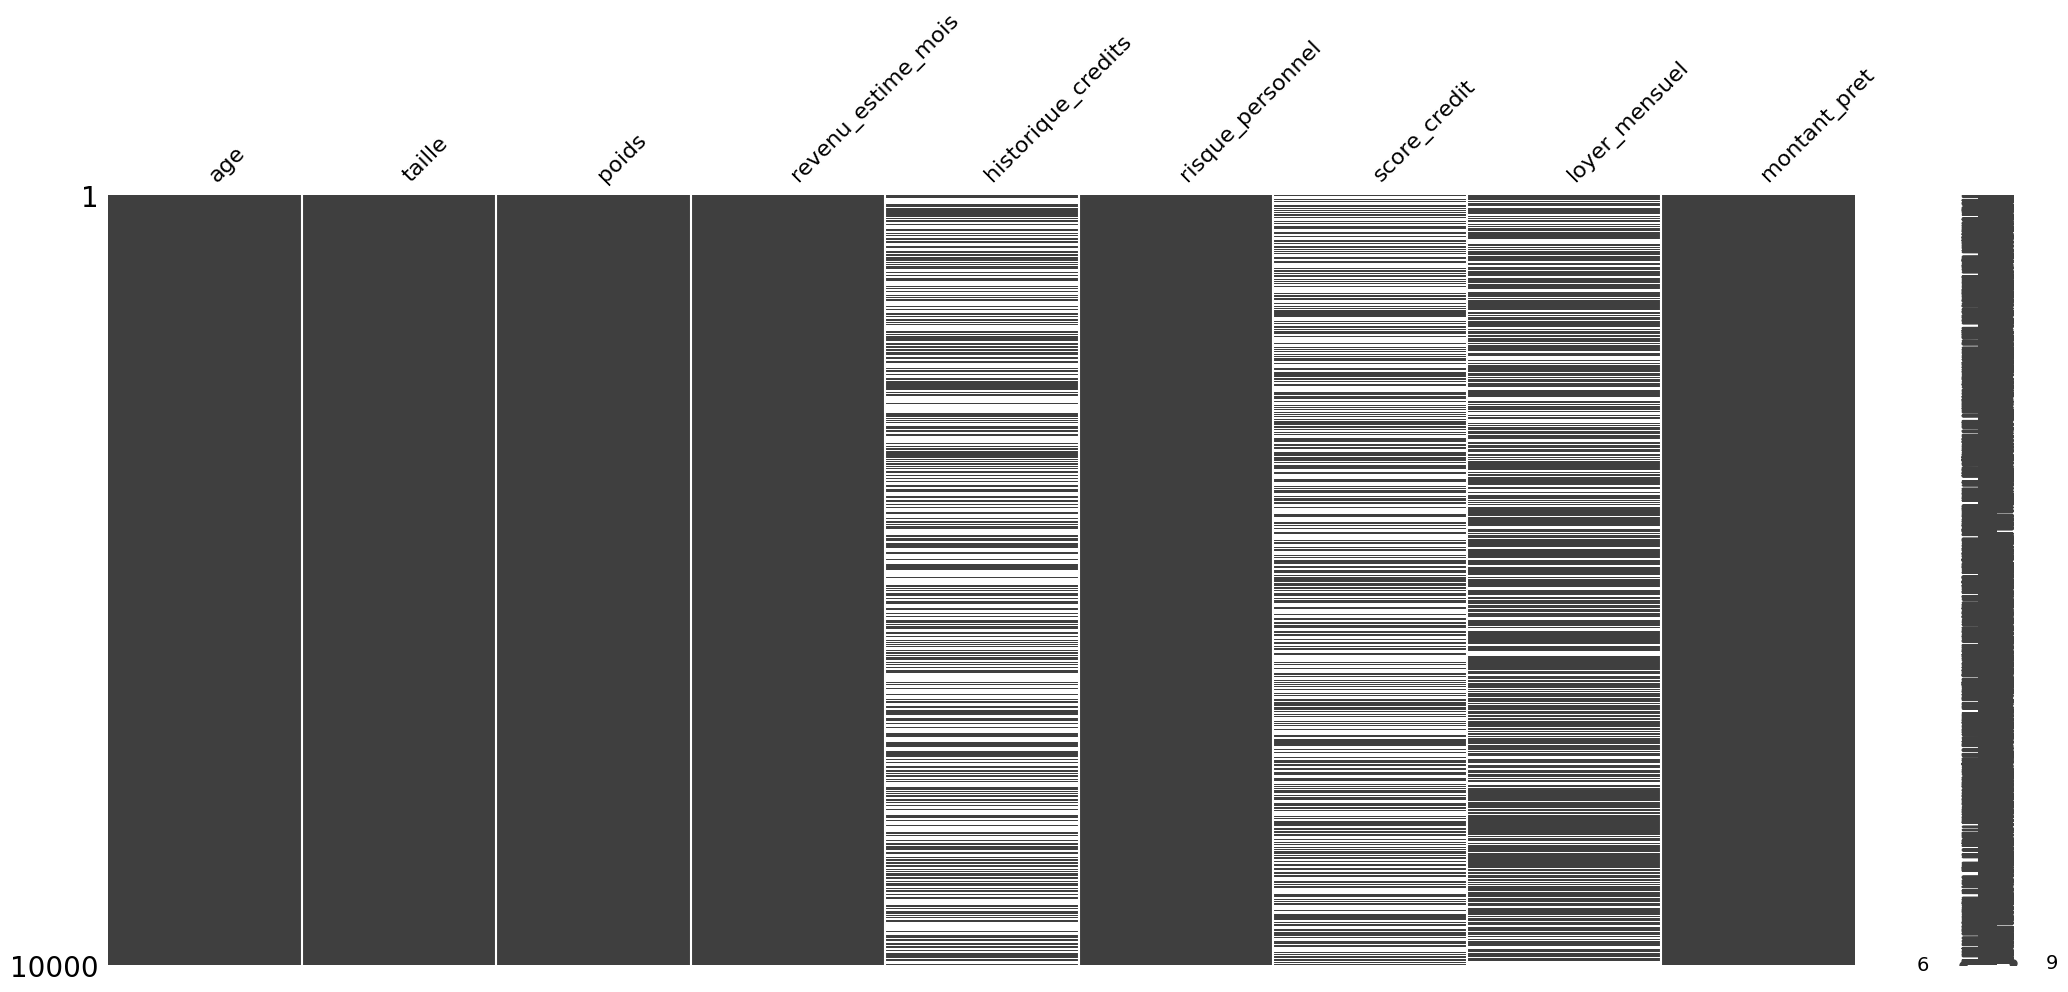

In [208]:
msno.matrix(df)

In [209]:
col_to_delete = ['historique_credits', 'score_credit']

### Outliers

In [210]:
cols = ['age', 'taille', 'poids', 'revenu_estime_mois', 'risque_personnel', 'loyer_mensuel', 'montant_pret']

In [211]:
# Verification
for col in cols:
    if col in df.columns:
        print(df[detect_outliers(df, col)])

Empty DataFrame
Columns: [age, taille, poids, revenu_estime_mois, historique_credits, risque_personnel, score_credit, loyer_mensuel, montant_pret]
Index: []
      age  taille  poids  revenu_estime_mois  historique_credits  \
170    27   137.6   57.3                3193                 NaN   
671    26   141.5   66.3                2796                 4.0   
692    71   197.9   73.6                2161                 3.0   
716    41   199.5   49.5                3646                 1.0   
890    33   136.0   86.8                 500                 NaN   
909    44   198.4   74.2                2701                 NaN   
1388   64   198.8   42.6                2989                 2.0   
1635   23   142.0   69.1                4409                 NaN   
1721   34   197.8   61.6                2231                 NaN   
1858   74   200.6   44.9                2763                 NaN   
1932   36   198.0   72.6                2145                 NaN   
2074   31   140.8   84.6   

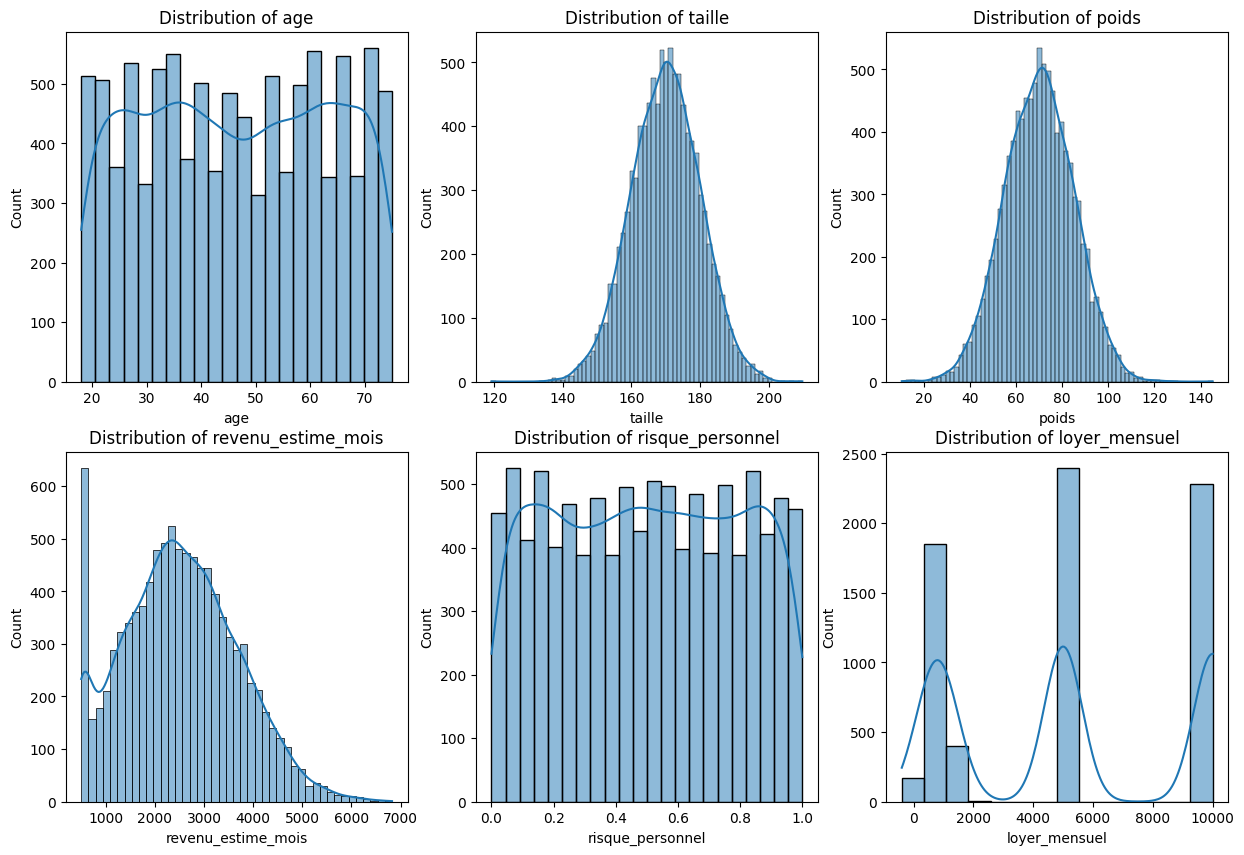

In [212]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes = axes.flatten()

for i, col in enumerate(cols[:-1]):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.show()

<Axes: xlabel='montant_pret', ylabel='Count'>

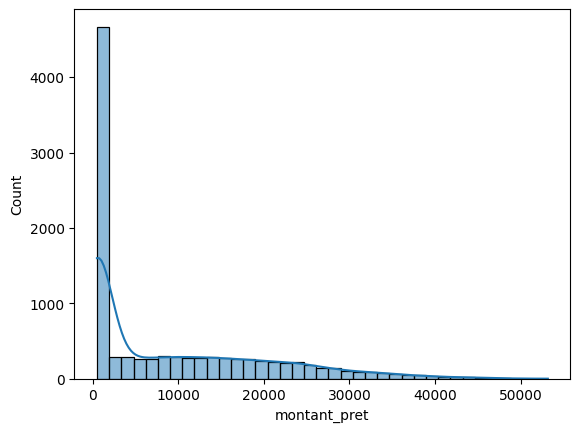

In [213]:
sns.histplot(df['montant_pret'], kde=True)

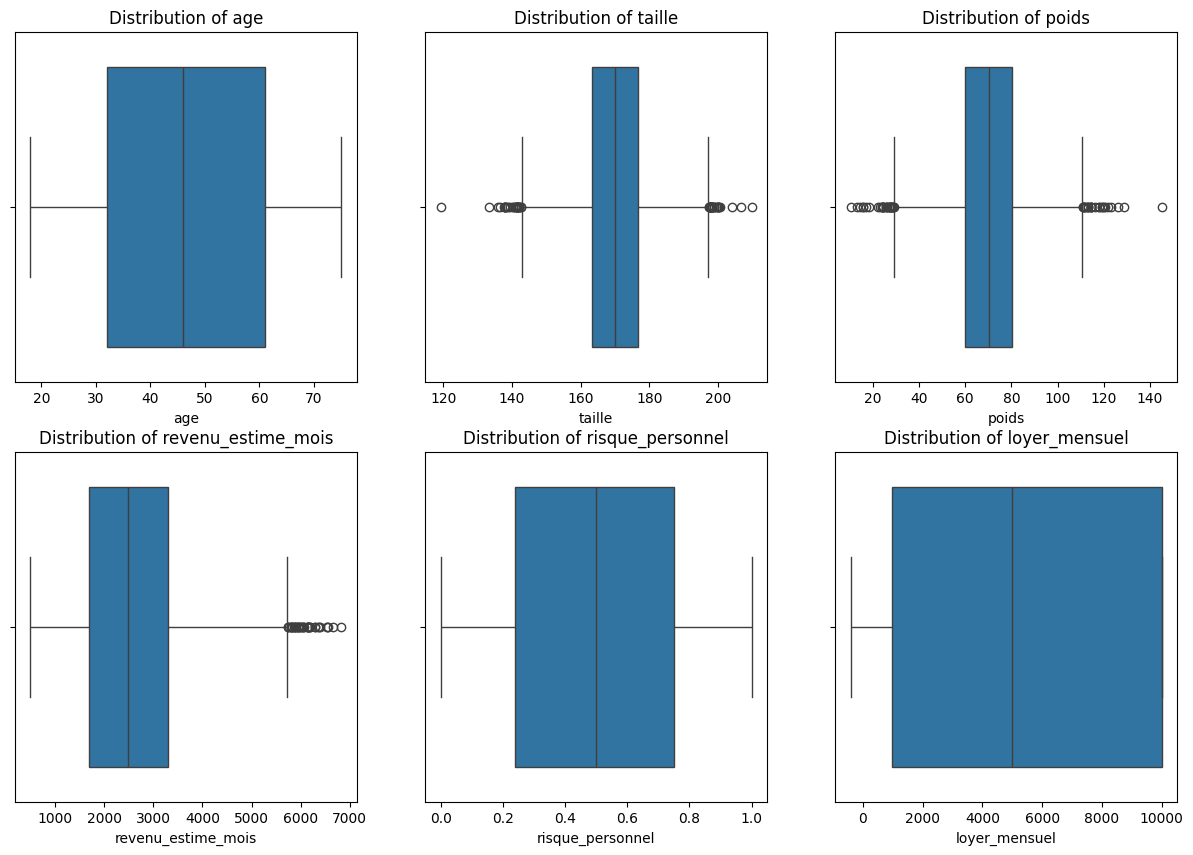

In [214]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes = axes.flatten()

for i, col in enumerate(cols[:-1]):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.show()

Text(0.5, 1.0, 'Montant du prêt')

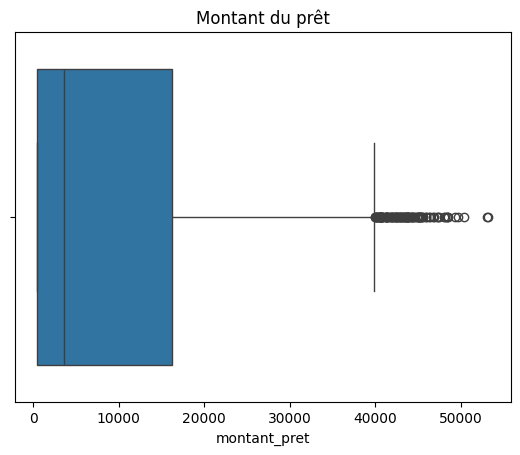

In [215]:
sns.boxplot(x=df['montant_pret'])
plt.title('Montant du prêt')

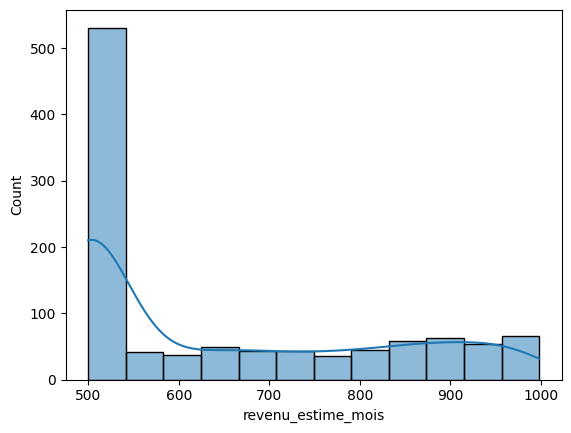

In [216]:
sns.histplot(df[df['revenu_estime_mois'] < 1000]['revenu_estime_mois'], kde=True)
plt.show()

## Nettoyage des données

### Suppression des colonnes trop lacunaires (>50%)

In [217]:
df = df.drop(columns=['historique_credits', 'score_credit'])

df.shape

(10000, 7)

### Remplacement des valeurs manquantes et négatives

In [ ]:
loyer_mensuel_mean = df.loc[df['loyer_mensuel'] > 0, 'loyer_mensuel'].mean()
is_to_be_replaced = (df['loyer_mensuel'] < 0) | (df['loyer_mensuel'].isnull()) | (df['loyer_mensuel'].isna())
df.loc[is_to_be_replaced, 'loyer_mensuel'] = loyer_mensuel_mean
df['loyer_mensuel'].describe()

count    10000.000000
mean      5187.803334
std       3151.860510
min          8.510000
25%       5000.000000
50%       5187.803334
75%       5187.803334
max      10000.000000
Name: loyer_mensuel, dtype: float64

### Relacement des valeurs aberrantes par la moyenne

In [221]:
for col in cols:
    if col in df.columns:
        mean = df[col].mean()
        if df[col].dtype == 'int64':
            mean = int(round(mean))
        outliers = detect_outliers(df, col)
        df.loc[outliers, col] = mean

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 10000 non-null  int64  
 1   taille              10000 non-null  float64
 2   poids               10000 non-null  float64
 3   revenu_estime_mois  10000 non-null  int64  
 4   risque_personnel    10000 non-null  float64
 5   loyer_mensuel       10000 non-null  float64
 6   montant_pret        10000 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 547.0 KB


In [225]:
df.describe()

,age,taille,poids,revenu_estime_mois,risque_personnel,loyer_mensuel,montant_pret
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,46.516500,170.005011,70.088619,2506.349700,0.499094,5142.824436,8794.994499
std,16.832845,9.739804,14.590330,1134.483309,0.290107,80.154403,10193.487731
min,18.000000,142.800000,29.200000,500.000000,0.000000,5000.000000,500.000000
25%,32.000000,163.300000,59.900000,1683.000000,0.240000,5187.803334,500.000000
50%,46.000000,170.003760,70.100000,2480.000000,0.500000,5187.803334,3600.605667
75%,61.000000,176.700000,80.200000,3285.000000,0.750000,5187.803334,15656.682439
max,75.000000,197.000000,110.800000,5727.000000,1.000000,5187.803334,39850.276110


### Vérifications

In [223]:
df['loyer_mensuel'].describe()

count    10000.000000
mean      5142.824436
std         80.154403
min       5000.000000
25%       5187.803334
50%       5187.803334
75%       5187.803334
max       5187.803334
Name: loyer_mensuel, dtype: float64

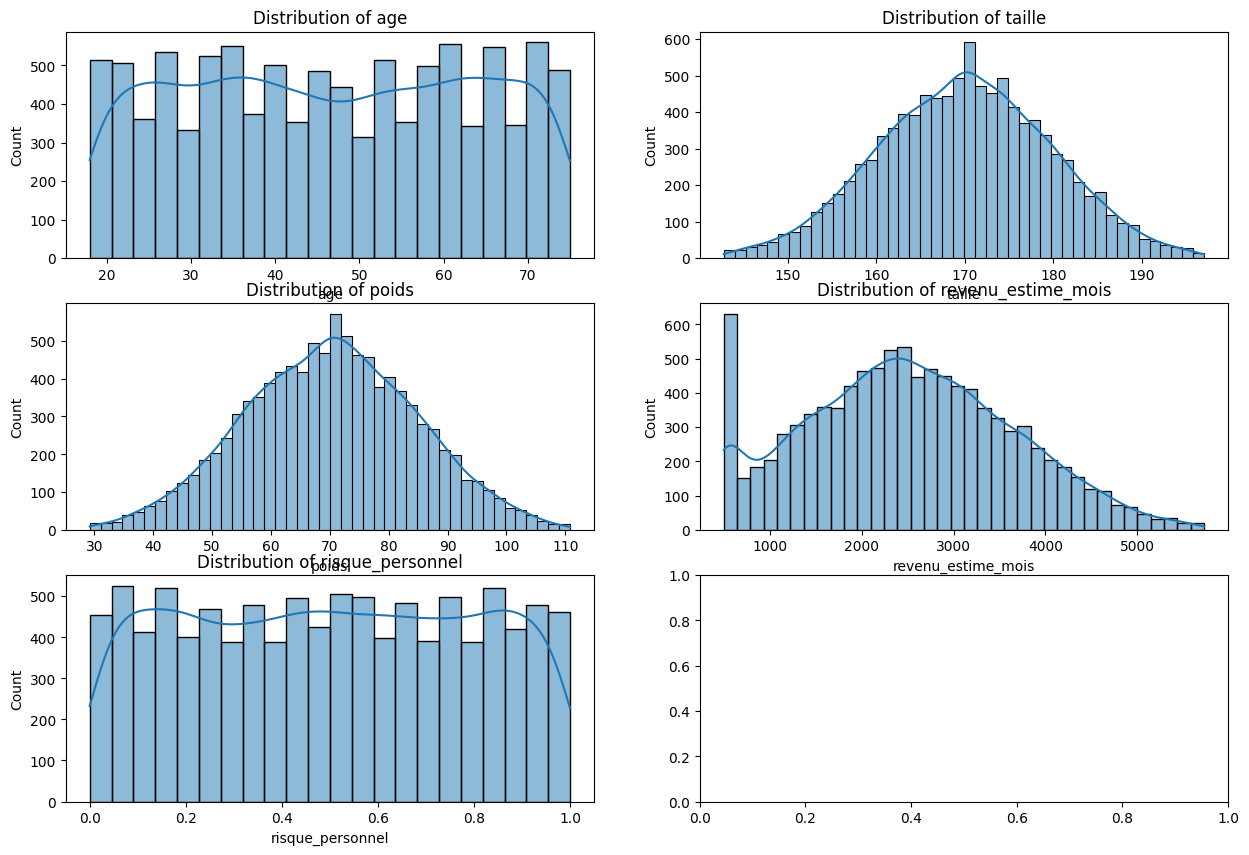

In [226]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

axes = axes.flatten()

for i, col in enumerate(cols[:-2]):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.show()

## Export du csv nettoyé

In [ ]:
df.to_csv('./data/cleaned_data.csv')